In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
X_train =  datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor(),download=True)
X_test =  datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor(),Download=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.2MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 207kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.93MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.39MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [6]:
X_train,X_test


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [7]:
#convert data into batches
train_loader = DataLoader(X_train, batch_size=64, shuffle=True)
test_loader = DataLoader(X_test, batch_size=64, shuffle=True)

In [8]:
len(train_loader) ,len(test_loader)

(938, 157)

In [16]:
#build the class with 3 input_dim,hidden_layer1,hidden_layer2,hidden_layer3,ouptu_dim

class Ann(nn.Module):
  def __init__(self,input_layer, hidden_layer1, hidden_layer2,hidden_layer3,output_layer):
    super().__init__()
    self.fc1 = nn.Sequential(
        nn.Linear(input_layer,hidden_layer1),
        nn.ReLU()
    )
    self.fc2 = nn.Sequential(
        nn.Linear(hidden_layer1,hidden_layer2),
        nn.ReLU()
    )
    self.fc3 = nn.Sequential(
        nn.Linear(hidden_layer2,hidden_layer3),
        nn.ReLU()
    )
    self.fc4 = nn.Sequential(
        nn.Linear(hidden_layer3,output_layer),
        nn.ReLU()
    )
  def forward(self,x):
    x = x.view(x.shape[0],-1)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = self.fc4(x)
    return F.log_softmax(x,dim=1)

In [17]:
hidden_layer = 28*28
input_layer1 = 256
input_layer2 = 128
input_layer3 = 64
output_layer = 10

model = Ann(hidden_layer,input_layer1,input_layer2,input_layer3,output_layer)

In [18]:
model

Ann(
  (fc1): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
  )
  (fc3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
  )
  (fc4): Sequential(
    (0): Linear(in_features=64, out_features=10, bias=True)
    (1): ReLU()
  )
)

In [21]:
model.state_dict()

OrderedDict([('fc1.0.weight',
              tensor([[-0.0182,  0.0252, -0.0190,  ...,  0.0036, -0.0293,  0.0308],
                      [ 0.0305,  0.0166,  0.0239,  ..., -0.0211,  0.0140,  0.0224],
                      [-0.0046, -0.0091,  0.0016,  ..., -0.0082, -0.0194,  0.0195],
                      ...,
                      [ 0.0203, -0.0311,  0.0047,  ..., -0.0263, -0.0308,  0.0121],
                      [ 0.0151,  0.0140, -0.0173,  ...,  0.0193,  0.0231, -0.0315],
                      [-0.0165, -0.0014, -0.0284,  ...,  0.0009,  0.0156, -0.0143]])),
             ('fc1.0.bias',
              tensor([-0.0317, -0.0170, -0.0130,  0.0230,  0.0204, -0.0025,  0.0270, -0.0103,
                      -0.0054, -0.0283, -0.0230, -0.0091,  0.0180,  0.0079, -0.0289, -0.0072,
                      -0.0104,  0.0143, -0.0129, -0.0203, -0.0255,  0.0043, -0.0123, -0.0085,
                       0.0179,  0.0041, -0.0324,  0.0035,  0.0031, -0.0056, -0.0197,  0.0218,
                      -0.0205, -

In [25]:
#loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

In [24]:
#Build the traing loop
epochs = 10

for epoch in range(epochs):
  print(f"epochs {epoch+1}")
  train_loss = 0.0
  train_acc = 0.0
  for i,data in enumerate(train_loader,1):
    images,labels = data
    images = images.view(images.shape[0],-1)
    images = images.to(device)
    labels = labels.to(device)
    res = model(images)
    loss = loss_fn(res,labels)
    train_loss += loss.item()
    _,prediction = torch.max(res,1)
    train_acc +=(prediction==labels).float().mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i%300==0:
      print(f"[{i+1} / {i}]  Loss:{train_loss/i:6f}, Accuracy:{train_acc/i:6f}")
    print(f'[{i+1}/ {i}] loss: {train_loss/i:6f}, Accuracy: {train_acc/i:6f}')

Streaming output truncated to the last 5000 lines.
[651/ 650] loss: 0.728911, Accuracy: 0.741683
[652/ 651] loss: 0.728836, Accuracy: 0.741695
[653/ 652] loss: 0.729135, Accuracy: 0.741564
[654/ 653] loss: 0.728955, Accuracy: 0.741553
[655/ 654] loss: 0.728888, Accuracy: 0.741590
[656/ 655] loss: 0.728879, Accuracy: 0.741627
[657/ 656] loss: 0.728627, Accuracy: 0.741735
[658/ 657] loss: 0.728317, Accuracy: 0.741866
[659/ 658] loss: 0.728552, Accuracy: 0.741784
[660/ 659] loss: 0.728366, Accuracy: 0.741915
[661/ 660] loss: 0.728680, Accuracy: 0.741856
[662/ 661] loss: 0.728699, Accuracy: 0.741845
[663/ 662] loss: 0.728532, Accuracy: 0.741857
[664/ 663] loss: 0.728495, Accuracy: 0.741940
[665/ 664] loss: 0.728890, Accuracy: 0.741835
[666/ 665] loss: 0.728882, Accuracy: 0.741823
[667/ 666] loss: 0.729015, Accuracy: 0.741765
[668/ 667] loss: 0.729234, Accuracy: 0.741707
[669/ 668] loss: 0.729050, Accuracy: 0.741790
[670/ 669] loss: 0.728818, Accuracy: 0.741872
[671/ 670] loss: 0.728587, Ac

In [26]:
#validation code
model.eval()
val_acc = 0.0
val_loss = 0.0
for i,data in enumerate(test_loader,1):
  images,labels = data
  images = images.view(images.shape[0],-1)
  images = images.to(device)
  labels = labels.to(device)
  with torch.no_grad():
    res = model(images)
    loss = loss_fn(res,labels)
  val_loss += loss.item()
  _,prediction = torch.max(res,1)
  val_acc +=(prediction==labels).float().mean()
  print(f'[{i+1}/ {i}] loss: {val_loss/i:6f}, Accuracy: {val_acc/i:6f}')


[2/ 1] loss: 0.678225, Accuracy: 0.765625
[3/ 2] loss: 0.807588, Accuracy: 0.703125
[4/ 3] loss: 0.719800, Accuracy: 0.750000
[5/ 4] loss: 0.734822, Accuracy: 0.742188
[6/ 5] loss: 0.722156, Accuracy: 0.753125
[7/ 6] loss: 0.680321, Accuracy: 0.763021
[8/ 7] loss: 0.667634, Accuracy: 0.770089
[9/ 8] loss: 0.651654, Accuracy: 0.779297
[10/ 9] loss: 0.667824, Accuracy: 0.769097
[11/ 10] loss: 0.674861, Accuracy: 0.764063
[12/ 11] loss: 0.697092, Accuracy: 0.758523
[13/ 12] loss: 0.699240, Accuracy: 0.757812
[14/ 13] loss: 0.696338, Accuracy: 0.756010
[15/ 14] loss: 0.700474, Accuracy: 0.753348
[16/ 15] loss: 0.707012, Accuracy: 0.755208
[17/ 16] loss: 0.722629, Accuracy: 0.750000
[18/ 17] loss: 0.736392, Accuracy: 0.741728
[19/ 18] loss: 0.742083, Accuracy: 0.739583
[20/ 19] loss: 0.735934, Accuracy: 0.740132
[21/ 20] loss: 0.750682, Accuracy: 0.734375
[22/ 21] loss: 0.750065, Accuracy: 0.735119
[23/ 22] loss: 0.745195, Accuracy: 0.736506
[24/ 23] loss: 0.728154, Accuracy: 0.741848
[25/ 

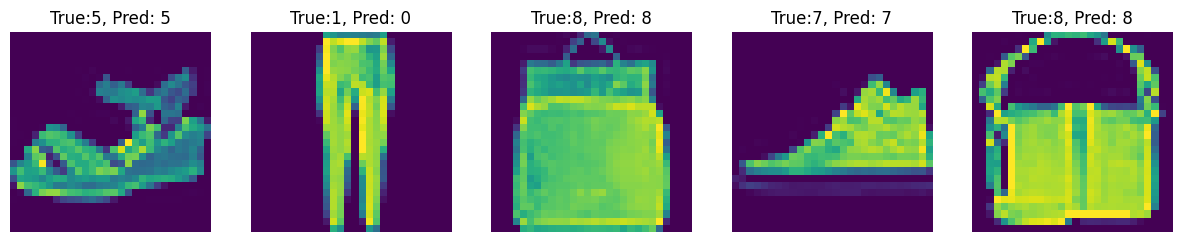

In [27]:
images,labels = next(iter(test_loader))
images = images.reshape(-1,28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_,predicted = torch.max(outputs,1)

fig ,ax = plt.subplots(1,5,figsize=(15,3))
for i in range(5):
    ax[i].imshow(images[i].cpu().detach().numpy().reshape(28,28))
    ax[i].set_title(f"True:{labels[i].item()}, Pred: {predicted[i].item()}")
    ax[i].axis("off")

plt.show()